Learning how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more!

## Common data problems
convert data types, apply range constraints to remove future data points, and remove duplicated data points to avoid double-counting.

In [3]:
import pandas as pd
ride_sharing = pd.read_csv('ride_sharing.csv')

In [4]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


### Summing strings and concatenating numbers
The `strip()` method removes any leading, and trailing whitespaces. 

In [5]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


### Tire size constraints
Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

In [ ]:
# Print tire size description
print(ride_sharing['tire_sizes'].describe())
count     25760
unique        2
top          27
freq      13274
Name: tire_sizes, dtype: int64

### Back to the future


In [ ]:
# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

In [ ]:
# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())
2023-07-15

### Finding duplicates
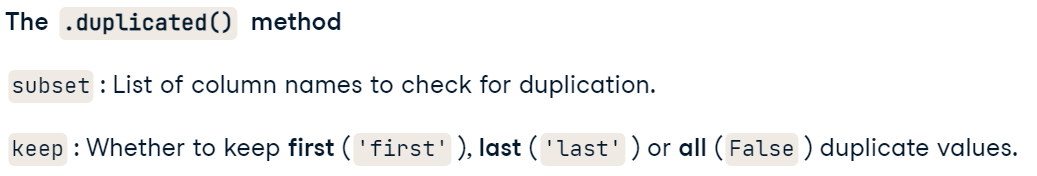

In [9]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'bike_id', keep = False) #('bike_id', False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id    duration  user_birth_year
3638        11  12 minutes             1988
6088        11   5 minutes             1985
10857       11   4 minutes             1987
10045       27  13 minutes             1989
16104       27  10 minutes             1970
...        ...         ...              ...
8812      6638  10 minutes             1986
6815      6638   5 minutes             1995
8456      6638   7 minutes             1983
8300      6638   6 minutes             1962
8380      6638   8 minutes             1984

[25717 rows x 3 columns]


### Treating duplicates
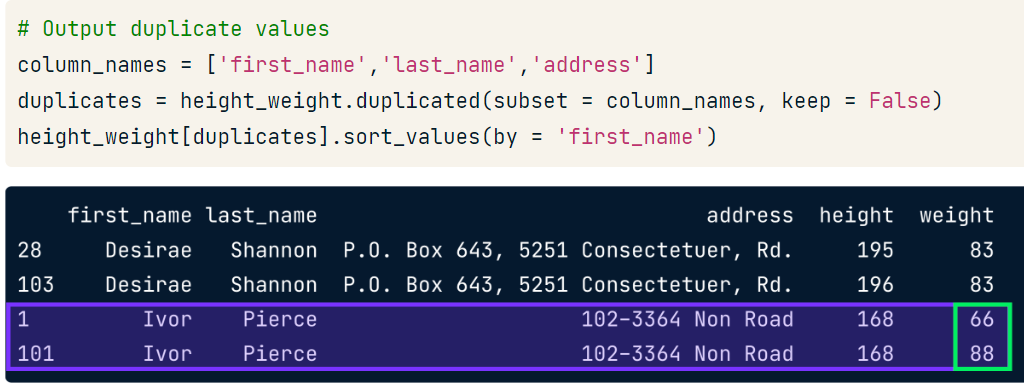
can combine these two rows into on by computing the average


treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

In [11]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

In [12]:
ride_unique[duplicates].sort_values(by = 'bike_id')

,bike_id,user_birth_year,duration_time


## Text and categorical data problems
Learn how to fix whitespace and capitalization inconsistencies in category labels, collapse multiple categories into one, and reformat strings for consistency.

### Finding consistency
use two DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames. 

In [15]:
categories = pd.read_excel('categorise.xlsx')
airlines = pd.read_csv('airlines.csv')

In [19]:
# Print categories DataFrame
print(categories)

      cleanliness  safety                    satisfaction
0  Clean                    Neutral        Very satisfied
1  Average                Very safe               Neutral
2   Somewhat clean    Somewhat safe    Somewhat satisfied
3   Somewhat dirty      Very unsafe  Somewhat unsatisfied
4            Dirty  Somewhat unsafe      Very unsatisfied


In [ ]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

In [ ]:
Cleanliness:  ['Clean', 'Average', 'Unacceptable', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (6, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty', 'Unacceptable'] 

Safety:  ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe'] 

Satisfaction:  ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied']

`Cleanliness` has an inconsistent category: `Unacceptable`

In [ ]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

# print(cat_clean)
# {'Unacceptable'}

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
print(airlines[cat_clean_rows])

In [ ]:
# Print rows with inconsistent category
print(airlines[cat_clean_rows])
       id        day           airline  destination  dest_region dest_size boarding_area   dept_time  wait_min   cleanliness         safety        satisfaction
4    2992  Wednesday          AMERICAN        MIAMI      East US       Hub   Gates 50-59  2018-12-31     559.0  Unacceptable      Very safe  Somewhat satisfied
18   2913     Friday  TURKISH AIRLINES     ISTANBUL  Middle East       Hub  Gates 91-102  2018-12-31     225.0  Unacceptable      Very safe  Somewhat satisfied
100  2321  Wednesday         SOUTHWEST  LOS ANGELES      West US       Hub   Gates 20-39  2018-12-31     130.0  Unacceptable  Somewhat safe  Somewhat satisfied

In [ ]:
# Print rows with consistent categories only
print(airlines[~cat_clean_rows])

### Inconsistent categories
examine two categorical columns from the DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. 

In [21]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['Asia' 'Canada/Mexico' 'West US' 'East US' 'Midwest US' 'EAST US'
 'Middle East' 'Europe' 'eur' 'Central/South America'
 'Australia/New Zealand' 'middle east']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


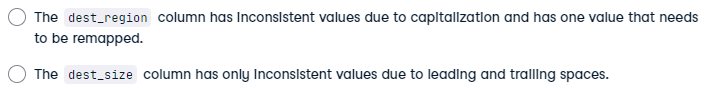

In [23]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower()
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']


In [24]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


### Remapping categories
The airlines DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

* `wait_type`: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
* `day_week`: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.<br>
 Let's create some new categorical data!

INF：Infinity，代表的是无穷大的意思，也是属于浮点类型。np.inf表示正无穷大，-np.inf表示负无穷大，一般在出现除数为0的时候为无穷大。比如2/0。

In [26]:
import numpy as np

In [27]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

In [29]:
print(airlines['wait_type'])

0       medium
1       medium
2       medium
3         long
4         long
         ...  
2472      long
2473    medium
2474    medium
2475    medium
2476      long
Name: wait_type, Length: 2477, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']


In [30]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

In [31]:
print(airlines['day_week'])

0       weekday
1       weekday
2       weekday
3       weekday
4       weekday
         ...   
2472    weekday
2473    weekday
2474    weekday
2475    weekday
2476    weekend
Name: day_week, Length: 2477, dtype: object


### Cleaning text data
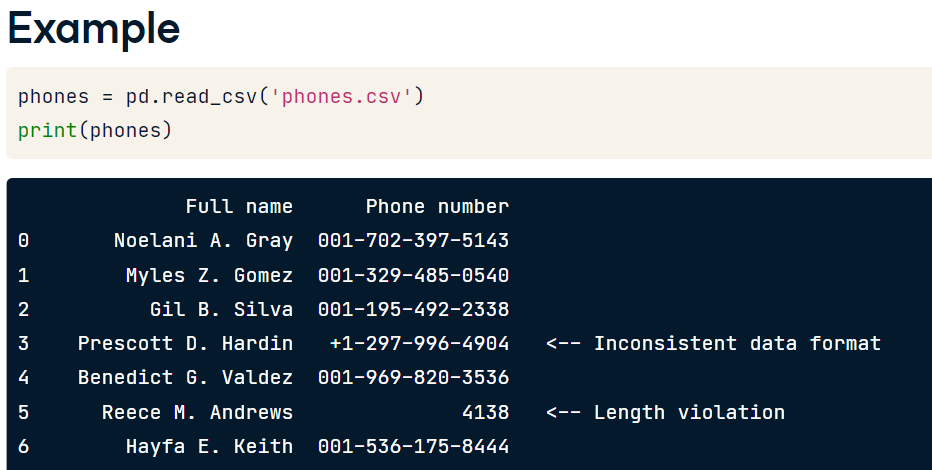

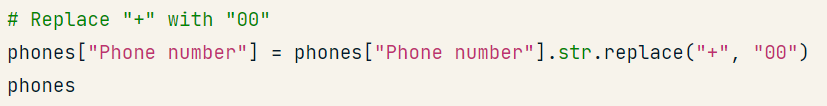

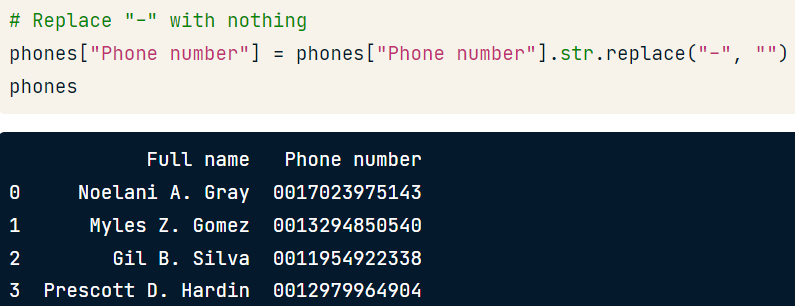

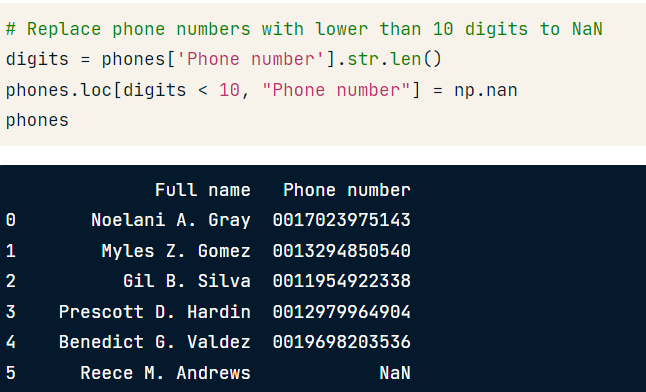

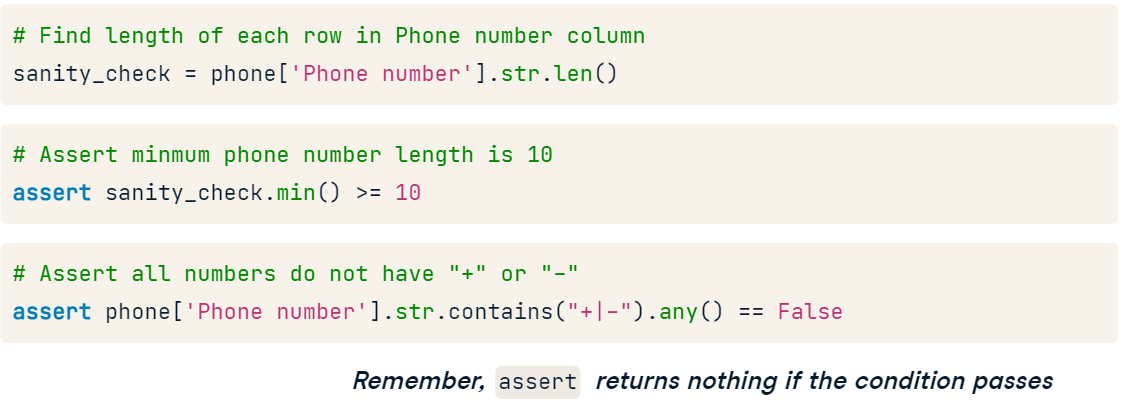

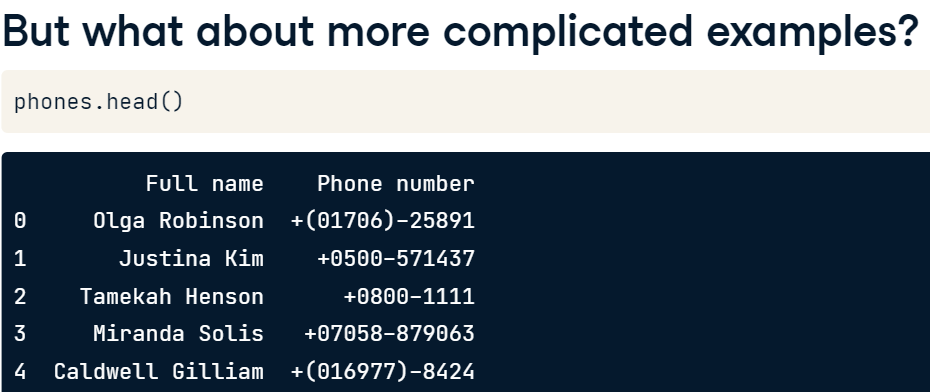

**Regular expressions** give us the ability to search for any pattern in text data, like only digits for example. They are like control + find in your browser, but way more dynamic and robust.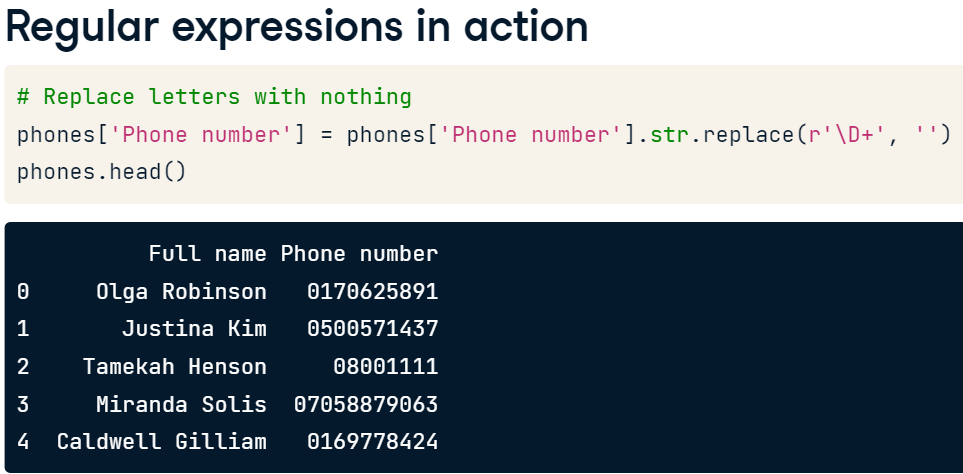

This is essentially us telling pandas to replace anything that is not a digit with nothing. 

### Removing titles and taking names
While collecting survey respondent metadata in the airlines DataFrame, the full name of respondents was saved in the full_name column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "Dr.", "Mr.", "Ms." and "Miss".<br>

create two new columns named first_name and last_name, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.


In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

### Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.<br>

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an `assert `statement.

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

In [ ]:
# Print new survey_response column
print(airlines_survey['survey_response'])
18    The airport personnell forgot to alert us of d...
19    The food in the airport was really really expe...
20    One of the other travelers was really loud and...
21    I don't remember answering the survey with the...
22    The airport personnel kept ignoring my request...
23    The chair I sat in was extremely uncomfortable...
24    I wish you were more like other airports, the ...
25    I was really unsatisfied with the wait times b...
27    The flight was okay, but I didn't really like ...
28    We were really slowed down by security measure...
29    There was a spill on the aisle next to the bat...
30    I felt very unsatisfied by how long the flight...
Name: survey_response, dtype: object

## Advanced data problems
In this chapter, you’ll dive into more advanced data cleaning problems, such as ensuring that weights are all written in kilograms instead of pounds. You’ll also gain invaluable skills that will help you verify that values have been added correctly and that missing values don’t negatively impact your analyses.

### Uniform currencies
understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. 

In [36]:
banking = pd.read_csv("banking.csv")

In [ ]:
print(banking)
     cust_id  acct_amount acct_cur  inv_amount account_opened last_transaction
0   8C35540A     44244.71   dollar    35500.50       03-05-18         30-09-19
1   D5536652     86506.85   dollar    81921.86       21-01-18         14-01-19
2   A631984D     77799.33   dollar    46412.27       26-01-18         06-10-19
3   93F2F951     93875.24     euro    76563.35       21-08-17         10-07-19
4   DE0A0882     99998.35     euro    18669.01       05-06-17         15-01-19
..       ...          ...      ...         ...            ...              ...
92  CEC1CAE5     92169.14   dollar    77896.86       26-11-17         08-10-18
93  4C7F8638     21942.37   dollar    11715.24       14-07-18         02-02-19
94  A81D31B3     74010.15   dollar    48787.47       02-06-18         12-09-18
95  93A17007     40651.36   dollar     9387.87       28-05-17         08-03-19
96  E961CA44     27907.16   dollar    10967.69       23-10-17         11-07-19

In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

print(acct_eu)

In [ ]:
print(acct_eu)
0     False
1     False
2     False
3     False
4     False
      ...  
92    False
93    False
94    False
95    False
96    False
Name: acct_cur, Length: 97, dtype: bool

In [ ]:
# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

### Uniform dates
analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing.

In [ ]:
# Print the header of account_opened
print(banking['account_opened'].head())

In [ ]:
print(banking['account_opened'].head())
0          2018-03-05
1            21-01-18
2    January 26, 2018
3            21-14-17
4            05-06-17
Name: account_opened, dtype: object

In [40]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

set the infer_datetime_format argument to True, and set errors equal to coerce. This will infer the format and return missing value for dates that couldn't be identified and converted instead of a value error.<br>
这将推断格式，并返回无法识别和转换的日期的缺失值，而不是值错误。

In [41]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


### Cross field validation
Cross field validation is the use of multiple fields in your dataset to sanity check the integrity of your data.<br><br>
Do so by cross field checking values of `inv_amount` and `age` against the amount invested in different funds and customers' birthdays. 

In [49]:
banking = pd.read_csv("banking.csv")
banking

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19
96,96,B99CD662,1989-12-12,31,92838.44,49089,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19
97,97,13770971,1984-11-29,36,92750.87,27962,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19
98,98,93E78DA3,1969-12-14,51,41942.23,29662,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18


In [44]:
# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# by first subsetting on the columns to sum, then using the sum method with the axis argument set to 1 to indicate row wise summing.
# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

In [45]:
banking[fund_columns]

,fund_A,fund_B,fund_C,fund_D
0,30105.0,4138.0,1420.0,15632.0
1,4995.0,938.0,6696.0,2421.0
2,10323.0,4590.0,8469.0,1185.0
3,3908.0,492.0,6482.0,12830.0
4,12158.4,51281.0,13434.0,18383.0
...,...,...,...,...
95,190.0,931.0,1451.0,4943.0
96,2453.0,7892.0,31486.0,7258.0
97,3352.0,7547.0,8486.0,8577.0
98,1758.0,11174.0,11650.0,5080.0


In [46]:
banking[fund_columns].sum(axis = 1)

0     51295.0
1     15050.0
2     24567.0
3     23712.0
4     95256.4
       ...   
95     7515.0
96    49089.0
97    27962.0
98    29662.0
99    32149.0
Length: 100, dtype: float64

In [48]:
# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [56]:
import datetime as dt

# Convert to datetime and get today's date
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

In [57]:
# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


### Missing investors
You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness.

**missingno**
The missingno package allows to create useful visualizations of our missing data.

In [58]:
# !pip install missingno

In [61]:
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
# Print number of missing values in banking
print(banking.isna().sum())

In [ ]:
print(banking.isna().sum())
cust_id              0
age                  0
acct_amount          0
inv_amount          13
account_opened       0
last_transaction     0
dtype: int64

In [ ]:
# Visualize missingness matrix
msno.matrix(banking)
plt.show()

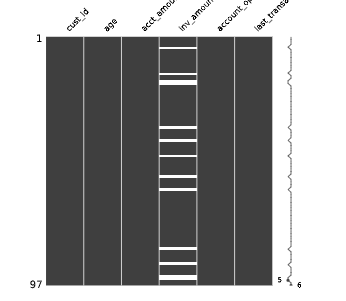

This matrix essentially shows how missing values are distributed across a column.

In [ ]:
# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking ['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

In [ ]:
missing_investors.describe()

In [ ]:
          age  acct_amount  inv_amount
count  13.000       13.000         0.0
mean   21.846    73231.238         NaN
std     1.519    25553.327         NaN
min    20.000    21942.370         NaN
25%    21.000    66947.300         NaN
50%    21.000    86028.480         NaN
75%    23.000    89855.980         NaN
max    25.000    99998.350         NaN

In [ ]:
investors.describe()

In [ ]:
          age  acct_amount  inv_amount
count  84.000       84.000      84.000
mean   43.560    75095.273   44717.885
std    10.411    32414.506   26031.246
min    26.000    12209.840    3216.720
25%    34.000    57373.062   22736.037
50%    45.000    83061.845   44498.460
75%    53.000    94165.965   66176.803
max    59.000   250046.760   93552.690

In [ ]:
# Sort banking by age and visualize
banking_sorted = banking.sort_values('age')
msno.matrix(banking_sorted)
plt.show()

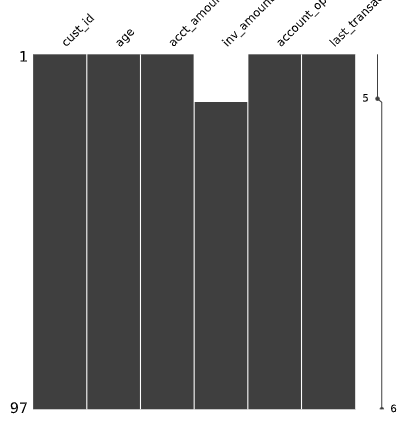

Notice how all missing values are on the top? This is because values are sorted from smallest to largest by default. This essentially confirms that inv_amount measurements are lost for really low age.

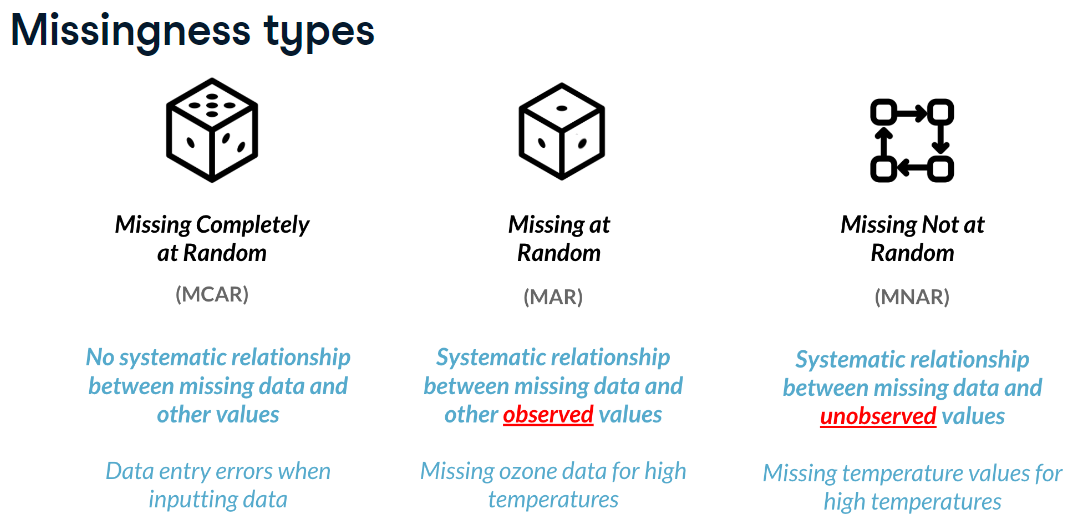

### Follow the money
You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of `banking` with missing `cust_ids`, and impute missing values of acct_amount with some domain knowledge.

In [ ]:
banking

     cust_id  acct_amount  inv_amount account_opened last_transaction
0   8C35540A     44244.71    35500.50       03-05-18         30-09-19
1   D5536652          NaN    81921.86       21-01-18         14-01-19
2   A631984D          NaN    46412.27       26-01-18         06-10-19
3   93F2F951          NaN    76563.35       21-08-17         10-07-19
4   DE0A0882          NaN    18669.01       05-06-17         15-01-19
..       ...          ...         ...            ...              ...
92  CEC1CAE5     92169.14    77896.86       26-11-17         08-10-18
93  4C7F8638     21942.37    11715.24       14-07-18         02-02-19
94  A81D31B3     74010.15    48787.47       02-06-18         12-09-18
95  93A17007     40651.36     9387.87       28-05-17         08-03-19
96       NaN     27907.16    10967.69       23-10-17         11-07-19

[97 rows x 5 columns]

In [ ]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

In [ ]:
banking_fullid

     cust_id  acct_amount  inv_amount account_opened last_transaction
0   8C35540A     44244.71    35500.50       03-05-18         30-09-19
1   D5536652          NaN    81921.86       21-01-18         14-01-19
2   A631984D          NaN    46412.27       26-01-18         06-10-19
3   93F2F951          NaN    76563.35       21-08-17         10-07-19
4   DE0A0882          NaN    18669.01       05-06-17         15-01-19
..       ...          ...         ...            ...              ...
91  0B44C3F8     33984.87    31395.00       10-04-18         28-09-19
92  CEC1CAE5     92169.14    77896.86       26-11-17         08-10-18
93  4C7F8638     21942.37    11715.24       14-07-18         02-02-19
94  A81D31B3     74010.15    48787.47       02-06-18         12-09-18
95  93A17007     40651.36     9387.87       28-05-17         08-03-19

[88 rows x 5 columns]

In [ ]:
print(banking_imputed.isna().sum())
cust_id             0
acct_amount         0
inv_amount          0
account_opened      0
last_transaction    0
dtype: int64

## Record linkage
Record linkage is a powerful technique used to merge multiple datasets together, used when values have typos or different spellings. In this chapter, you'll learn how to link records by calculating the similarity between strings—you’ll then use your new skills to join two restaurant review datasets into one clean master dataset.

**Minimum edit distance**
Minimum edit distance is a systematic way to identify how close 2 strings are.
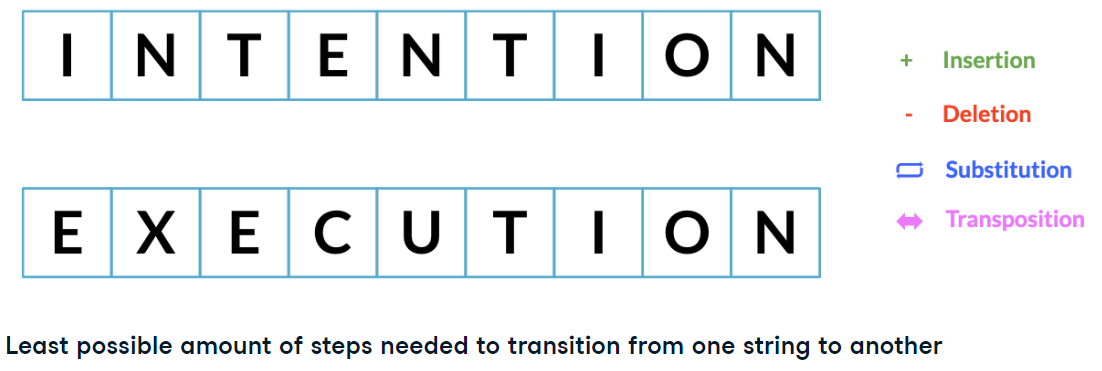

* **Insertion** of a new character.
* **Deletion** of an existing character.
* **Substitution** of an existing character.
* **Transposition** of two existing consecutive characters.

first start off by deleting I from intention, and adding C between E and N. Our minimum edit distance so far is 2, since these are two operations.
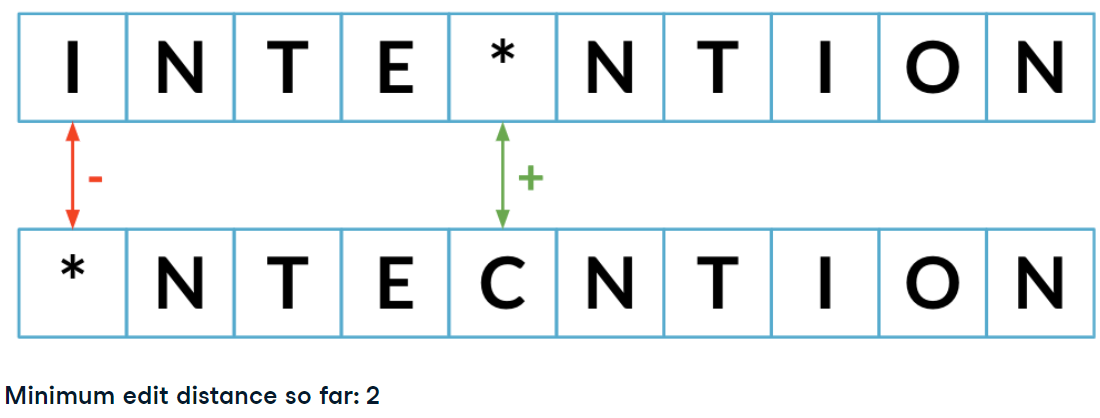

Then we substitute the first N with E, T with X, and N with U, leading us to execution! With the minimum edit distance being 5.
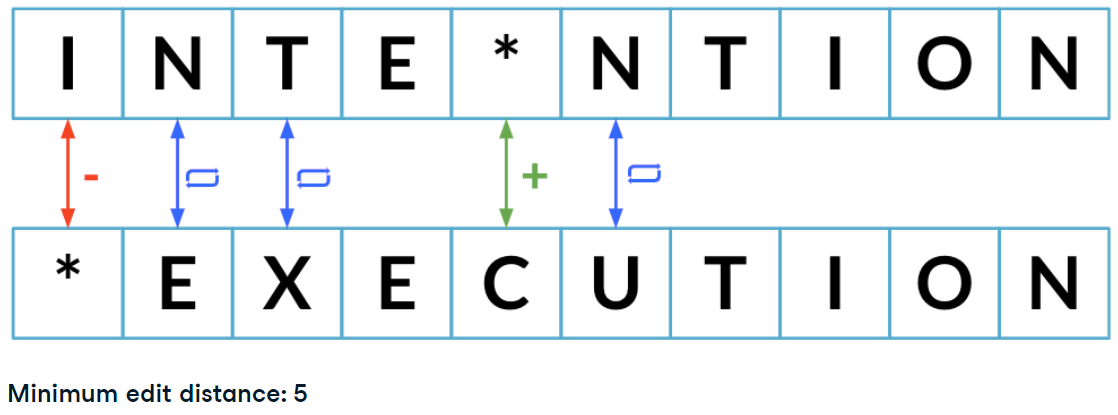

**The lower the edit distance, the closer two words are.** For example, the two different typos of reading have a minimum edit distance of 1 between them and reading.<br><br>
**the minimum edit distance score from earlier, where a lower minimum edit distance means a closer match.**
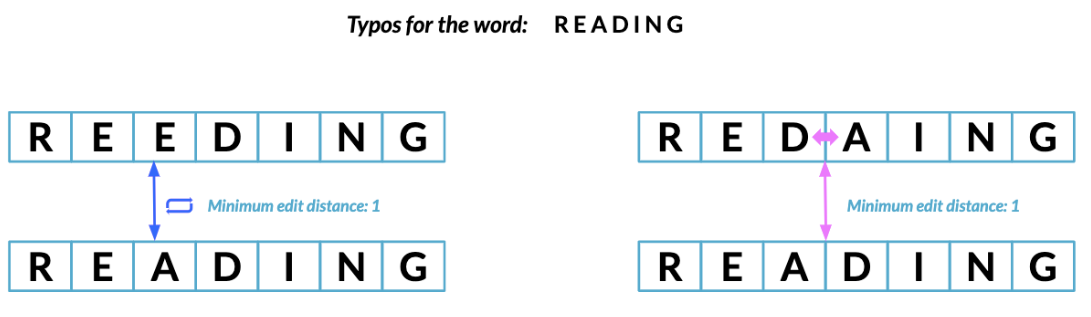

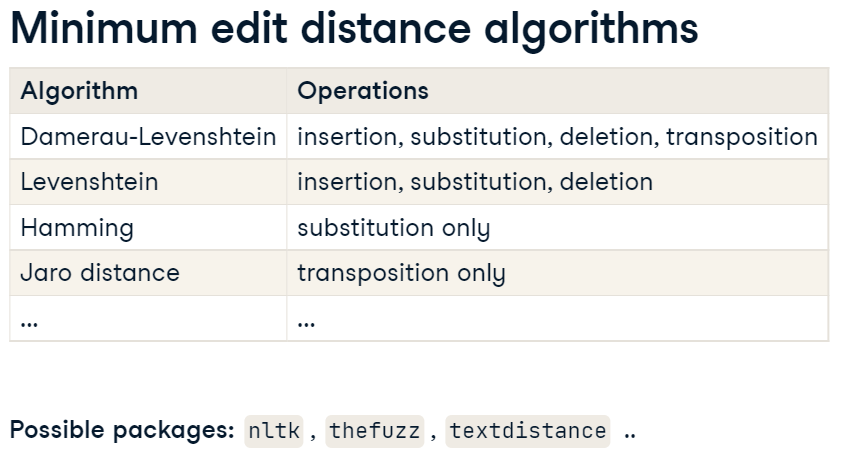

**thefuzz** is a package to perform string comparison. We first import fuzz from thefuzz, which allow us to compare between single strings.

In [64]:
#!pip install fuzz

In [66]:
#!pip install thefuzz

In [68]:
# lets us compare betwen two strings
from thefuzz import fuzz

# Compare reeding vs reading
fuzz.WRatio('Reeding', 'Reading')

86

**For any comparison function using thefuzz, our output is a score from 0 to 100 with 0 being not similar at all, 100 being an exact match.**

The **WRatio** function is highly robust against partial string comparison with different orderings

In [69]:
# Partial strings
fuzz.WRatio('Houston Rockets', 'Rockets')

90

In [70]:
# partial string comparison wih differant order
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')

86

**Comparison with arrays**

In [74]:
# Import process
from thefuzz import process

# Define string and array of possibel matches
string = 'Houston Rockets vs Los Angeles Lakers'
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets', 'Houson vs Los Angeles', 'Heat vs Bulls'])

process.extract(string, choices, limit = 2)

[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]

 return ranked from highest to lowest. It returns a list of tuples with 3 elements, the first one being the matching string being returned, the second one being its similarity score, and the third one being its index in the array.

**Collapsing categories with string matching**<br>
we have DataFrame named `survey` containing answers from respondents from the state of New York and California asking them how likely are you to move on a scale of 0 to 5. The state field was free text and contains hundreds of typos. Remapping them manually would take a huge amount of time. Instead, we'll use string similarity. We also have a `category` DataFrame containing the correct categories for each state. Let's collapse the incorrect categories with string matching!
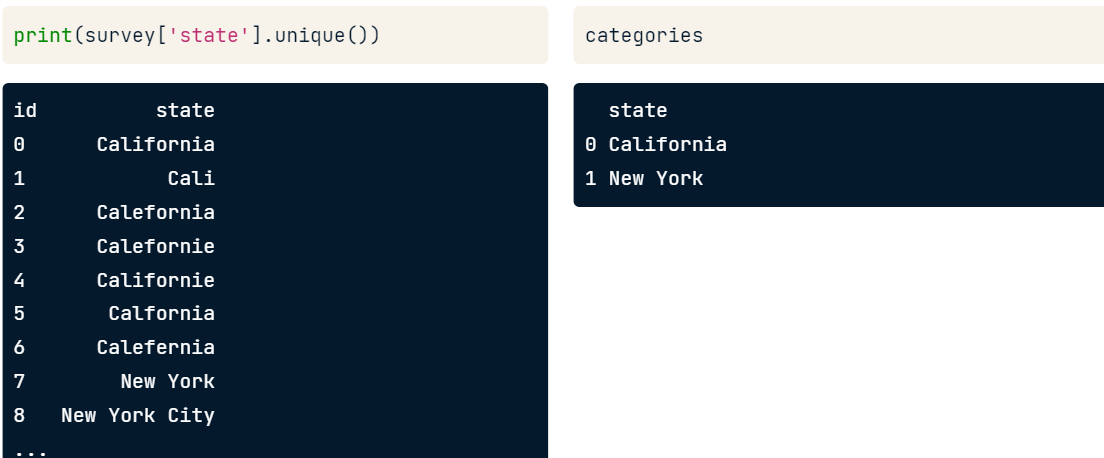

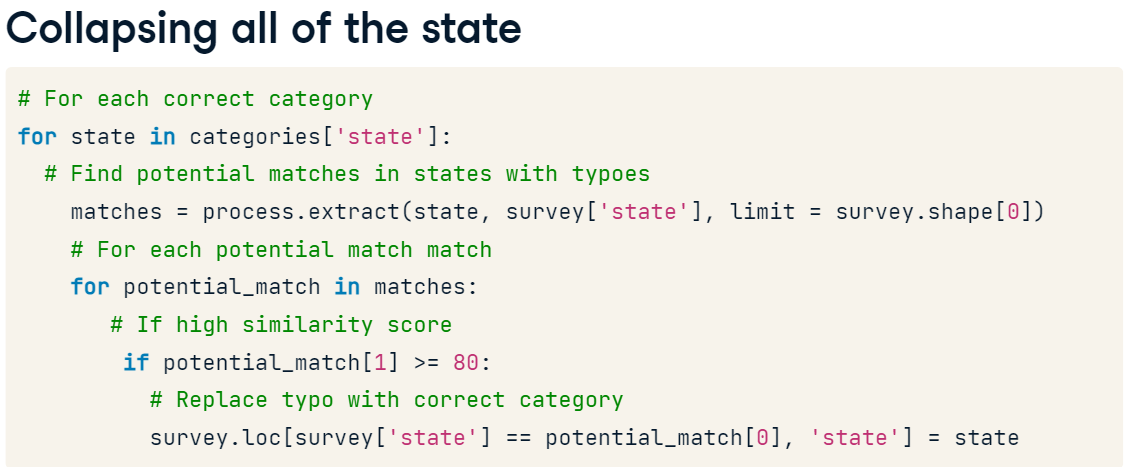

### The cutoff point
In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `thefuzz`'s `process.extract() `function by finding the similarity score of the most distant typo of each category.

In [77]:
restaurants = pd.read_csv("restaurants.csv")
restaurants

,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american
...,...,...,...,...,...,...
331,331,vivande porta via,2125 fillmore st.,san francisco,4153464430,italian
332,332,vivande ristorante,670 golden gate ave.,san francisco,4156739245,italian
333,333,world wrapps,2257 chestnut st.,san francisco,4155639727,american
334,334,wu kong,101 spear st.,san francisco,4159579300,asian


In [80]:
# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()
unique_types

array(['american', 'asian', 'italian', 'coffeebar', 'mexican',
       'southwestern', 'steakhouses', 'southern', 'cajun'], dtype=object)

In [81]:
# Calculate similarity of 'asian' to all values of unique_types
print(process.extract('asian', unique_types, limit = len(unique_types)))

# Calculate similarity of 'american' to all values of unique_types
print(process.extract('american', unique_types, limit = len(unique_types)))

# Calculate similarity of 'italian' to all values of unique_types
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('asian', 100), ('italian', 67), ('american', 62), ('mexican', 50), ('cajun', 40), ('southwestern', 36), ('southern', 31), ('coffeebar', 26), ('steakhouses', 25)]
[('american', 100), ('mexican', 80), ('cajun', 68), ('asian', 62), ('italian', 53), ('southwestern', 41), ('southern', 38), ('coffeebar', 24), ('steakhouses', 21)]
[('italian', 100), ('asian', 67), ('mexican', 43), ('american', 40), ('cajun', 33), ('southern', 27), ('southwestern', 26), ('steakhouses', 26), ('coffeebar', 12)]


Question
Take a look at the output, what do you think should be the similarity **cutoff point** when remapping categories?

Possible answers 80

### Remapping categories II
In the last exercise, you determined that the distance cutoff point for remapping typos of `'american'`, `'asian'`, and `'italian'` cuisine types stored in the `cuisine_type` column should be 80.

In this exercise, you're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using `fuzywuzzy.process`'s `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using `process.extract()`, the output is a list of tuples where each is formatted like:

`(closest match, similarity score, index of match)`
The `restaurants` DataFrame is in your environment, and you have access to a `categories` list containing the correct cuisine types (`'italian'`, `'asian'`, and `'american'`).

In [ ]:
# Inspect the unique values of the cuisine_type column
print(restaurants['type'].unique())

In [ ]:
['america' 'merican' 'amurican' 'americen' 'americann' 'asiane' 'itali'
 'asiann' 'murican' 'italien' 'italian' 'asiat' 'american' 'americano'
 'italiann' 'ameerican' 'asianne' 'italiano' 'americin' 'ammericann'
 'amerycan' 'aamerican' 'ameriican' 'italiaan' 'asiian' 'asiaan'
 'amerrican' 'ameerrican' 'ammereican' 'asian' 'italianne' 'italiian'
 'itallian']

Okay! Looks like you will need to use some string matching to correct these misspellings!

In [ ]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit = restaurants.shape[0])

# Inspect the first 5 matches
print(matches[0:5])

In [ ]:
[('italian', 100, 11), ('italian', 100, 25), ('italian', 100, 41), ('italian', 100, 47), ('italian', 100, 49)]


Now you're getting somewhere! Now you can iterate through `matches` to reassign similar entries.



In [88]:
# Create a list of matches, comparing 'italian' with the cuisine_type column
matches = process.extract('italian', restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

# Iterate through the list of matches to italian
for match in matches:
  # Check whether the similarity score is greater than or equal to 80
  if match[1] >= 80:
    # Select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
    restaurants.loc[restaurants['cuisine_type'] == match[0], 'cuisine_type'] = 'italian'

Finally, you'll adapt your code to work with every restaurant type in `categories.`



In [ ]:
# Iterate through categories
for cuisine in categories:  
  # Create a list of matches, comparing cuisine with the cuisine_type column
  matches = process.extract(cuisine, restaurants['cuisine_type'], limit=len(restaurants.cuisine_type))

  # Iterate through the list of matches
  for match in matches:
     # Check whether the similarity score is greater than or equal to 80
    if match[1] >= 80:
      # If it is, select all rows where the cuisine_type is spelled this way, and set them to the correct cuisine
      restaurants.loc[restaurants['cuisine_type'] == match[0]] = cuisine
      
# Inspect the final result
print(restaurants['cuisine_type'].unique())

In [ ]:
['american' 'asian' 'italian']

### Generating pairs
**Record linkage** is the act of linking data from different sources regarding the same entity. Generally, we clean two or more DataFrames, generate pairs of potentially matching records, score these pairs according to string similarity and other similarity metrics, and link them.
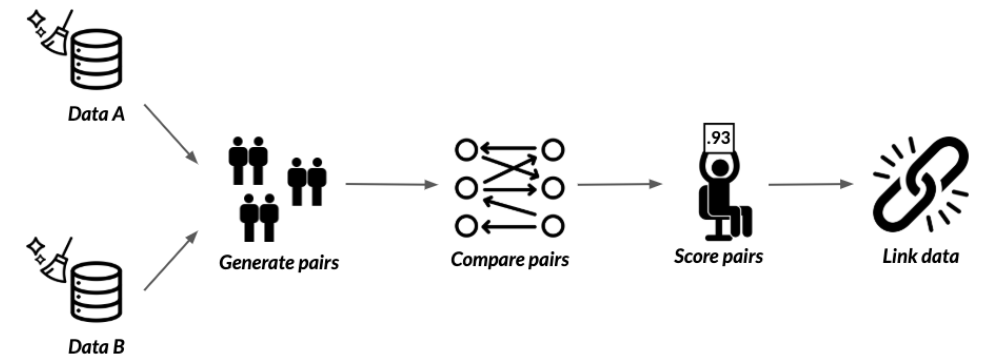

### To link or not to link?
Similar to joins, record linkage is the act of linking data from different sources regarding the same entity. But unlike joins, record linkage does not require exact matches between different pairs of data, and instead can find close matches using string similarity. This is why record linkage is effective when there are no common unique keys between the data sources you can rely upon when linking data sources such as a unique identifier.

### Pairs of restaurants
In the part 3, you cleaned the `restaurants` dataset to make it ready for building a restaurants recommendation engine. You have a new DataFrame named `restaurants_new` with new restaurants to train your model on, that's been scraped from a new data source.

You've already cleaned the `cuisine_type` and `city` columns using the techniques learned throughout the course. However you saw duplicates with typos in restaurants names that require record linkage instead of joins with `restaurants`.

In this exercise, you will perform the first step in record linkage and generate possible pairs of rows between restaurants and restaurants_new.

In [97]:
#!pip install recordlinkage

     -------------------------------------- 926.9/926.9 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 206.5/206.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: jellyfish
    Found existing installation: jellyfish 0.9.0
    Uninstalling jellyfish-0.9.0:
      Successfully uninstalled jellyfish-0.9.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [98]:
import recordlinkage

In [95]:
restaurants_new = pd.read_csv("restaurants_new.csv")

**Blocking** which creates pairs based on a matching column, reducing the number of possible pairs.

use the recordlinkage.Index() function, to create an indexing object. This essentially is an object we can use to generate pairs from our DataFrames. 

In [134]:
# Create an indexer and object and find possible pairs
indexer = recordlinkage.Index()

In [135]:
# Block pairing on cuisine_type
indexer.block('type')

# Generate pairs
pairs = indexer.index(restaurants, restaurants_new)
pairs

MultiIndex([( 0,  0),
            ( 0,  1),
            ( 0,  7),
            ( 0, 12),
            ( 0, 13),
            ( 0, 20),
            ( 0, 27),
            ( 0, 28),
            ( 0, 39),
            ( 0, 40),
            ...
            (42, 42),
            (44, 44),
            (46, 46),
            (48, 48),
            (55, 55),
            (60, 60),
            (64, 64),
            (69, 69),
            (77, 77),
            (78, 78)],
           length=592)

### Similar restaurants
In the last exercise, you generated pairs between `restaurants` and `restaurants_new` in an effort to cleanly merge both DataFrames using record linkage.

When performing record linkage, there are different types of matching you can perform between different columns of your DataFrames, including exact matches, string similarities, and more.

Now that your pairs have been generated and stored in `pairs`, you will find exact matches in the `city` and `cuisine_type` columns between each pair, and similar strings for each pair in the `rest_name` column.

In [136]:
# Create a comparison object
comp_cl = recordlinkage.Compare()

#This is similar to the indexing object we created while generating pairs, 
#but this one is responsible for assigning different comparison procedures for pairs

Use the appropriate comp_cl method to find exact matches between the city and cuisine_type columns of both DataFrames.

In [137]:
# Find exact matches on city, cuisine_types - 
comp_cl.exact('city', 'city', label='city')
comp_cl.exact('type', 'type', label='type')

#a label argument which lets us set the column name in the resulting DataFrame. 

<Compare>

Use the appropriate comp_cl method to find similar strings with a 0.8 similarity threshold in the rest_name column of both DataFrames.

In [138]:
# Find similar matches of rest_name
comp_cl.string('name', 'name', label='name', threshold = 0.8) 

<Compare>

In [139]:
# Get potential matches and print
potential_matches = comp_cl.compute(pairs, restaurants, restaurants_new)
print(potential_matches)

       city  type  name
0  0      1     1   1.0
   1      0     1   0.0
   7      0     1   0.0
   12     0     1   0.0
   13     0     1   0.0
...     ...   ...   ...
60 60     1     1   1.0
64 64     1     1   1.0
69 69     1     1   1.0
77 77     1     1   1.0
78 78     1     1   1.0

[592 rows x 3 columns]


**Note** that you need to always have the same order of DataFrames when inserting them as arguments when generating pairs, comparing between columns, and computing comparisons.

### Finding matching pairs
The output is a multi index DataFrame, where the first index is the row index from the first DataFrame, or `restaurants`, and the second index is a list of all row indices in `restaurants_new`. The columns are the columns being compared, **with values being 1 for a match, and 0 for not a match.**

### Finding the only pairs we want
To find potential matches, we just filter for rows where the sum of row values is higher than a certain threshold. 
<br>
. To find potential matches, you need to find rows with more than matching value in a column. You can find them with
potential_matches<br>`[potential_matches.sum(axis = 1) >= n]`<br>
Where n is the minimum number of columns you want matching to ensure a proper duplicate find, what do you think should the value of n be?

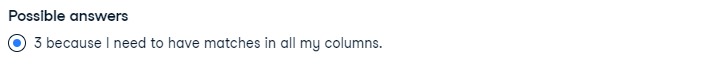

### Linking DataFrame
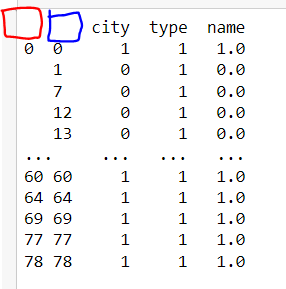
The first index column, stores indices from `restaurants`. The second index column, stores all possible indices from `restaurants_new`, for each row index of `restaurants`<Br><Br>
The first step in linking DataFrames, is to isolate the potentially matching pairs to the ones we're pretty sure of.

In [140]:
matches = potential_matches[potential_matches.sum(axis = 1) >= 3]
print(matches)

       city  type  name
0  0      1     1   1.0
1  1      1     1   1.0
7  7      1     1   1.0
12 12     1     1   1.0
13 13     1     1   1.0
...     ...   ...   ...
60 60     1     1   1.0
64 64     1     1   1.0
69 69     1     1   1.0
77 77     1     1   1.0
78 78     1     1   1.0

[82 rows x 3 columns]


The output is row indices between `restaurants` and `restaurants_new` that are most likely duplicates.<br><br>
Our next step is to extract the one of the index columns, and subsetting its associated DataFrame to filter for duplicates.

### Linking them together!

Now it's finally time to link both DataFrames. You will do so by first extracting all row indices of `restaurants_new` that are matching across the columns mentioned above from `potential_matches`. Then you will subset `restaurants_new` on these indices, then append the non-duplicate values to `restaurants`.

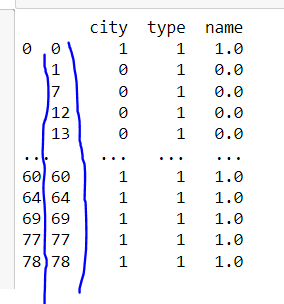
We choose the second index column, which represents row indices of `restaurants_new`. We want to extract those indices, and subset `restaurants_new` on them to remove duplicates with `restaurants` before appending them together.

#### Get the indices
We can access a DataFrame's index using the index attribute. Since this is a multi index DataFrame, it returns a multi index object containing pairs of row indices from `restaurants` and `restaurants_new` respectively. We want to extract all `restaurants_new` indices, so we chain it with the **get_level_values** method, which takes in which column index we want to extract its values. We can either input the index column's name, or its order, which is in this case 1.

In [141]:
matches.index

MultiIndex([( 0,  0),
            ( 1,  1),
            ( 7,  7),
            (12, 12),
            (13, 13),
            (20, 20),
            (27, 27),
            (28, 28),
            (39, 39),
            (40, 40),
            (43, 43),
            (49, 49),
            (50, 50),
            (51, 51),
            (53, 53),
            (54, 54),
            (61, 61),
            (67, 67),
            (74, 74),
            (81, 81),
            ( 2,  2),
            (30, 30),
            (34, 34),
            (36, 36),
            (80, 80),
            ( 3,  3),
            ( 4,  4),
            ( 5,  5),
            (11, 11),
            (17, 17),
            ( 6,  6),
            (22, 22),
            (45, 45),
            ( 8,  8),
            (59, 59),
            (72, 72),
            ( 9,  9),
            (52, 52),
            (68, 68),
            (10, 10),
            (37, 37),
            (14, 14),
            (21, 21),
            (47, 47),
            (57, 57),
          

In [142]:
# Get values of second column index of matches
matching_indices = matches.index.get_level_values(1)

In [143]:
matching_indices

Int64Index([ 0,  1,  7, 12, 13, 20, 27, 28, 39, 40, 43, 49, 50, 51, 53, 54, 61,
            67, 74, 81,  2, 30, 34, 36, 80,  3,  4,  5, 11, 17,  6, 22, 45,  8,
            59, 72,  9, 52, 68, 10, 37, 14, 21, 47, 57, 73, 75, 76, 15, 35, 56,
            58, 70, 16, 18, 19, 23, 29, 24, 63, 66, 25, 26, 65, 71, 79, 31, 32,
            33, 38, 62, 41, 42, 44, 46, 48, 55, 60, 64, 69, 77, 78],
           dtype='int64')

To find the duplicates in `restaurants_new`, we simply subset on all indices of `restaurants_new(index)`, with the ones found through record linkage. You can choose to examine them further for similarity with their duplicates in `restaurants_new(index)`, but if you're sure of your analysis, you can go ahead and find the non duplicates by repeating the exact same line of code, except by adding a tilde at the beginning of your subset.

In [146]:
# Finding duplicates in restaurants_new
dup = restaurants_new[restaurants_new.index.isin(matching_indices)]
dup

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
...,...,...,...,...,...,...
77,77,feast,1949 westwood blvd.,west la,3104750400,chinese
78,78,mulberry,17040 ventura blvd.,encino,8189068881,pizza
79,79,matsuhissa,129 n. la cienega blvd.,beverly hills,3106599639,asian
80,80,jiraffe,502 santa monica blvd,santa monica,3109176671,californian


In [147]:
# Subset restaurants_new based on non-duplicate values
non_dup = restaurants_new[~restaurants_new.index.isin(matching_indices)]

 Now that you have your non duplicates, all you need is a simple append using the DataFrame append method of census A, and you have your linked Data!

In [148]:
# Append non_dup to restaurants
full_restaurants = restaurants.append(non_dup)
print(full_restaurants)

    Unnamed: 0        name                       addr               city  \
0            0      kokomo          6333 w. third st.                 la   
1            1      feenix    8358 sunset blvd. west           hollywood   
2            2     parkway       510 s. arroyo pkwy .           pasadena   
3            3        r-23           923 e. third st.        los angeles   
4            4       gumbo          6333 w. third st.                 la   
..         ...         ...                        ...                ...   
77          77       feast        1949 westwood blvd.            west la   
78          78    mulberry        17040 ventura blvd.             encino   
79          79  matsuhissa   129 n. la cienega blvd.       beverly hills   
80          80     jiraffe      502 santa monica blvd       santa monica   
81          81    martha's  22nd street grill 25 22nd  st. hermosa beach   

         phone          type  
0   2139330773      american  
1   2138486677      ameri

C:\Users\wuyao\AppData\Local\Temp\ipykernel_10644\1365941311.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_restaurants = restaurants.append(non_dup)
